# REAL ESTATE REGRESSION ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as skl
from sklearn import preprocessing
import math
from scipy import stats 
import scipy.stats as stats
import statsmodels.api as sm

# TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler

# DUMMY VARIABLES
from sklearn.preprocessing import OneHotEncoder


# VARIANCE INFLATION FACTOR:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score


# MODELS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# OLS & LINEAR MODEL
from statsmodels.formula.api import ols

# KNN
from sklearn.neighbors import KNeighborsRegressor

#MLP
from sklearn.neural_network import MLPRegressor


## DATA COLLECTION

In [3]:
# Collect data

df = pd.read_excel('/Users/maravallejos/Ironhackk/Mid-Project/data/regression_data.xls')
df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [3]:
# Check dataframe dimensions

df.shape

(21597, 21)

There are 21 variables and 21597 entries in the dataframe.

In [4]:
# Check dataframe datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

All variables are numerical variables, either integers or floats, except for date.

## DATA CLEANING

In [5]:
# Check for null values

df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

There are no null values in the dataframe.

In [6]:
# Check for unique values in each column

df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [7]:
# Check numeric variables' statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


#### Variable 'id'

Variable id has 21420 unique values while the total number of entries is 21597. This shows there are properties that have more than one entry, i.e. have been sold more than once. 

To resolve this issue, the information for the last property sell is going to be kept.

In [8]:
# Create copy of dataframe

data = df.copy()
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [9]:
# Create copy of dataframe

data = df.copy()
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [10]:
# Drop duplicate id's with the oldest sell dates

data.drop_duplicates(subset='id', keep='last', inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  float64       
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  float64       
 7   waterfront     21420 non-null  int64         
 8   view           21420 non-null  int64         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int64         
 15  zipcode        2142

#### Variable 'date'

In [11]:
# Change date to date format

data['date'] = pd.to_datetime (data['date'])
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Variable yr_built

Variable yr_build is not going to be included in the model. With this variable, the houses' "age" is going to be calculared. 

In [12]:
# Find the most recent property sale year
most_recent_sale_year = data['date'].dt.year.max()

# Calculate the house_age by subtracting yr_built from the most recent sale year
data['house_age'] = most_recent_sale_year - data['yr_built']
data['house_age']


0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: house_age, Length: 21420, dtype: int64

#### Variable 'bedrooms'
Variable bedrooms has a range 1 to 33. Check unique values for bedroom variable since it could be a dataentry mistake and behave as outliers.

In [13]:
data['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There is one house with 33 bedrooms and one house with 11 bedrooms. This two entries are going to be eliminated from the dataframe.

In [14]:
# Eliminate entries with 33 and 11 bedrooms.

data = data[data['bedrooms'] != 33]
data = data[data['bedrooms'] != 11]

data['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64

### Convert to categorical variables

Variables 'waterfront' and 'yr_renovated' will be converted to categorical variables. 

In [15]:
data['waterfront'] = data['waterfront'].astype('category')
data.shape

(21418, 22)

In [16]:
# Create a new column 'renovated_status' and initialize it with 0
data['renovated_status'] = 0

# Set the value to 1 for all rows where 'yr_renovated' is not equal to 0
data.loc[data['yr_renovated'] != 0, 'renovated_status'] = 1

# Convert to categorical variable
data['renovated_status'] = data['renovated_status'].astype('category')


#### Variable 'zipcode'

Variable zipcode is going to be treated as a categorical variable. Later on, it will be converted to dummy variables. Meanwhile, its data type is going to be changes from integer to category

In [17]:
data ['zipcode']=data ['zipcode'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21418 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21418 non-null  int64         
 1   date              21418 non-null  datetime64[ns]
 2   bedrooms          21418 non-null  int64         
 3   bathrooms         21418 non-null  float64       
 4   sqft_living       21418 non-null  int64         
 5   sqft_lot          21418 non-null  int64         
 6   floors            21418 non-null  float64       
 7   waterfront        21418 non-null  category      
 8   view              21418 non-null  int64         
 9   condition         21418 non-null  int64         
 10  grade             21418 non-null  int64         
 11  sqft_above        21418 non-null  int64         
 12  sqft_basement     21418 non-null  int64         
 13  yr_built          21418 non-null  int64         
 14  yr_renovated      2141

#### Delete unnecessary columns from dataframe

The following variables are going to be eliminated since they are nos useful for the study: 'id', 'date', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated','lat', 'long'.

- Variables 'sqft_living15', 'sqft_lot15' have updated information about 'sqft_living', 'sqft_lot'. Where there have been no modifications in 'sqft_living', 'sqft_lot', the original data is kept. Therefore 'sqft_living', 'sqft_lot' are eliminated. 

- Variables 'yr_built' and yr_renovated' are eliminated since new, more useful variables were created. 

- Variables 'lat', 'long' are not going to be used in the model - variable 'zipcode'  will be used to understand how geograhic location affects properties's price. 'lat', 'long' will be used later on in the project. 

In [18]:
data = data.drop(['id', 'date', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated','lat', 'long'], axis = 1)

In [19]:
data_tableau=data.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21418 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bedrooms          21418 non-null  int64   
 1   bathrooms         21418 non-null  float64 
 2   floors            21418 non-null  float64 
 3   waterfront        21418 non-null  category
 4   view              21418 non-null  int64   
 5   condition         21418 non-null  int64   
 6   grade             21418 non-null  int64   
 7   sqft_above        21418 non-null  int64   
 8   sqft_basement     21418 non-null  int64   
 9   zipcode           21418 non-null  category
 10  sqft_living15     21418 non-null  int64   
 11  sqft_lot15        21418 non-null  int64   
 12  price             21418 non-null  int64   
 13  house_age         21418 non-null  int64   
 14  renovated_status  21418 non-null  category
dtypes: category(3), float64(2), int64(10)
memory usage: 2.2 MB


## EDA

### Numeric variables

#### Check for correlations

In [21]:
data_num=data.select_dtypes(include=np.number)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21418 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21418 non-null  int64  
 1   bathrooms      21418 non-null  float64
 2   floors         21418 non-null  float64
 3   view           21418 non-null  int64  
 4   condition      21418 non-null  int64  
 5   grade          21418 non-null  int64  
 6   sqft_above     21418 non-null  int64  
 7   sqft_basement  21418 non-null  int64  
 8   sqft_living15  21418 non-null  int64  
 9   sqft_lot15     21418 non-null  int64  
 10  price          21418 non-null  int64  
 11  house_age      21418 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 2.1 MB


/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/4015533436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


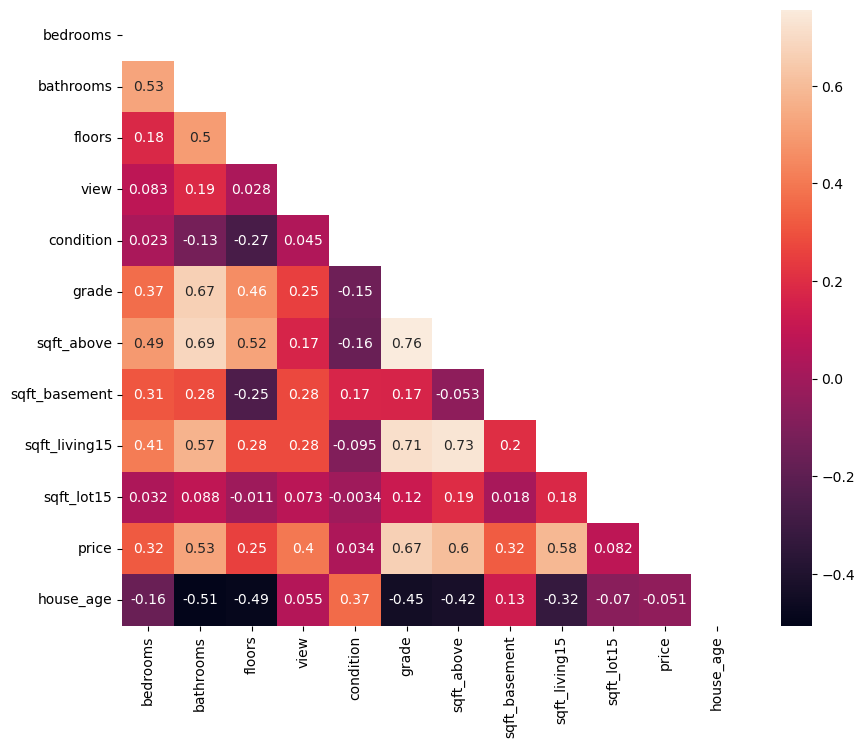

In [22]:
data_corr = data.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_corr, mask=mask, annot=True)
plt.show()

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


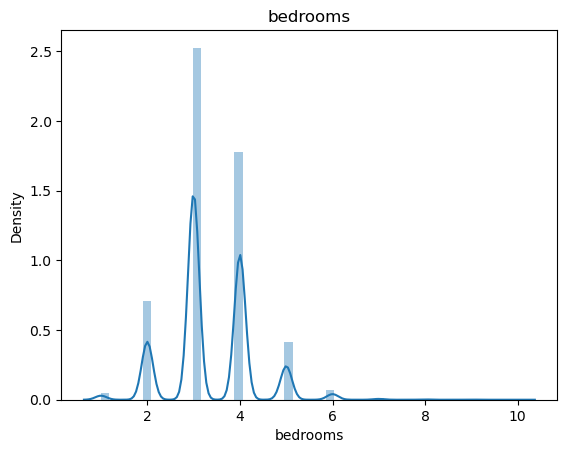

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


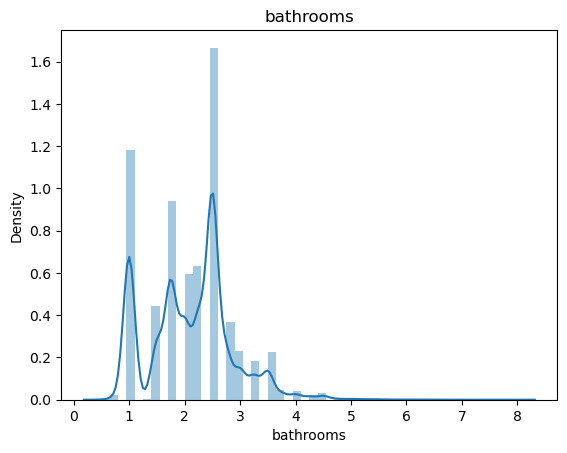

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


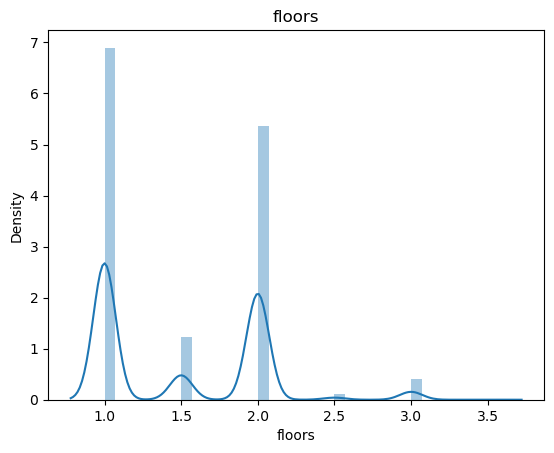

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


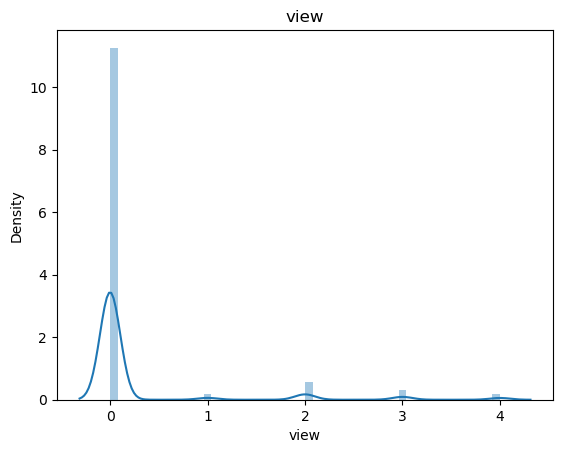

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


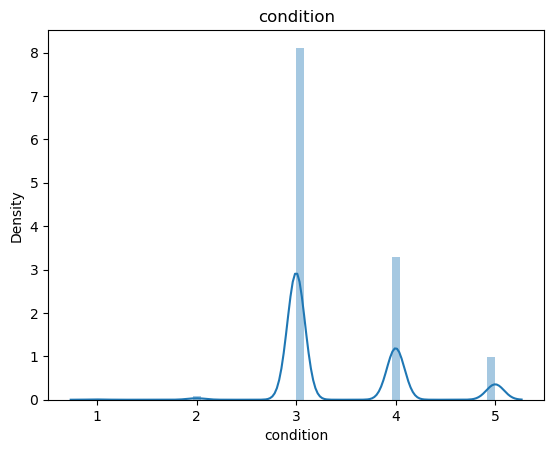

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


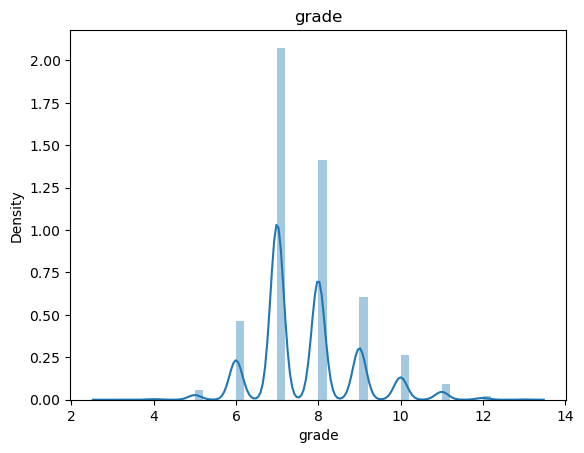

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


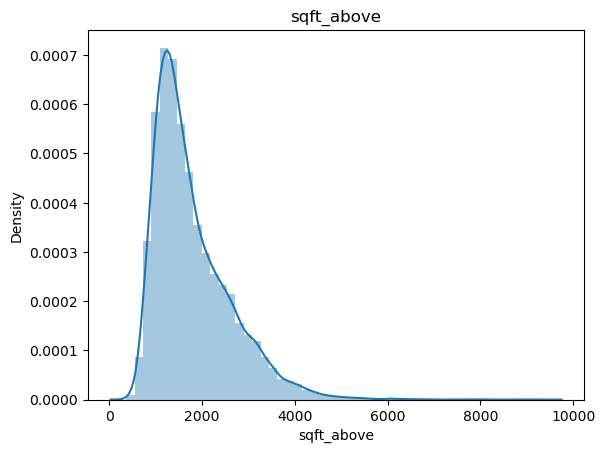

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


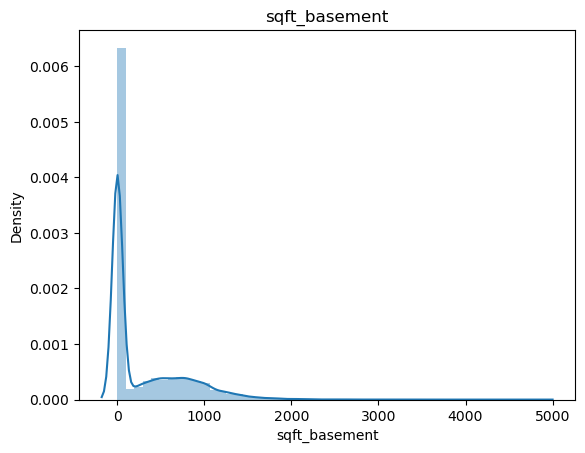

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


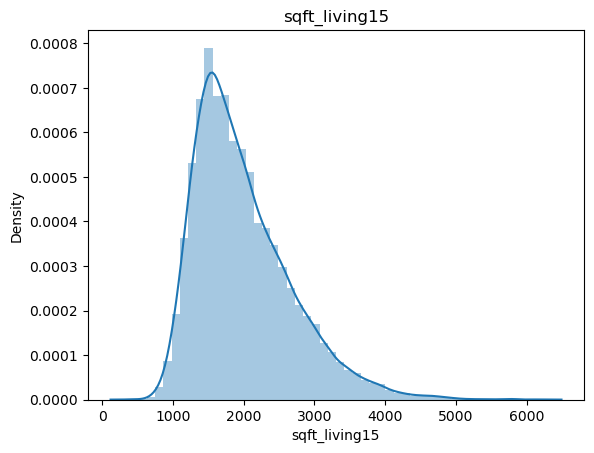

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


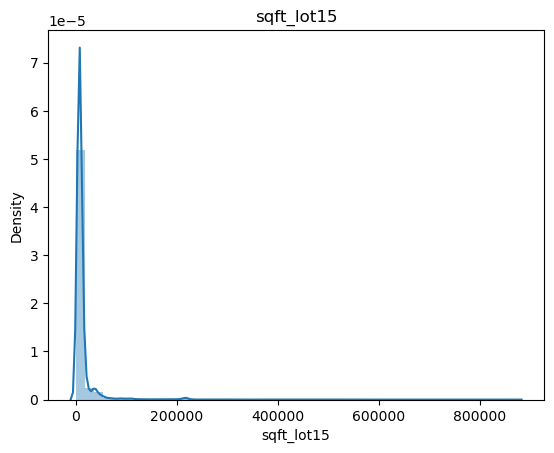

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


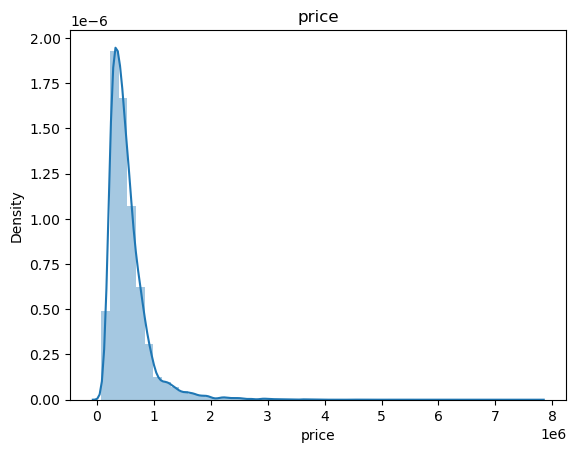

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/981877590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_num[col])


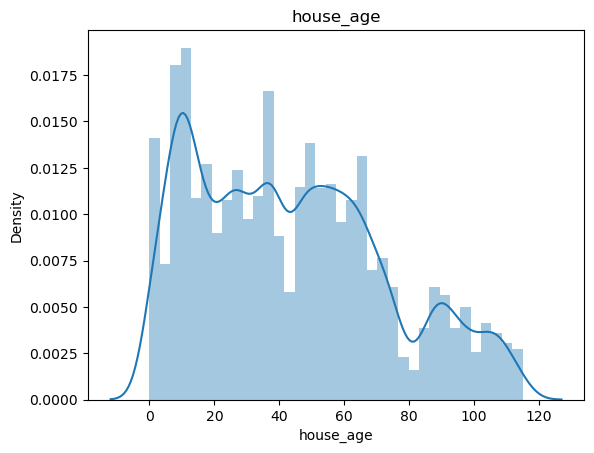

In [23]:
# To better understand numeric variables, distribution plots were drawn using seaborn library.

for col in data_num.columns:
    sns.distplot(data_num[col])
    plt.title(col)
    plt.show()

#### Transform numeric variables

Some variables show positive skweness. To correct this, varaibles are going to be scaled.

In [24]:
def minmax_scaler (dataframe, x):
    scaler = MinMaxScaler()
    data_to_scale = dataframe[[x]]
    scaled_data = scaler.fit_transform(data_to_scale)
    dataframe[x] = scaled_data

    return dataframe

In [25]:
list=['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']
for i in list:
    print (minmax_scaler(data_num, i))

       bedrooms  bathrooms  floors  view  condition  grade  sqft_above  \
0             3       1.00     1.0     0          3      7    0.089602   
1             3       2.25     2.0     0          3      7    0.199115   
2             2       1.00     1.0     0          3      6    0.044248   
3             4       3.00     1.0     0          5      7    0.075221   
4             3       2.00     1.0     0          3      8    0.144912   
...         ...        ...     ...   ...        ...    ...         ...   
21592         3       2.50     3.0     0          3      8    0.128319   
21593         4       2.50     2.0     0          3      8    0.214602   
21594         2       0.75     2.0     0          3      7    0.071903   
21595         3       2.50     2.0     0          3      8    0.136062   
21596         2       0.75     2.0     0          3      7    0.071903   

       sqft_basement  sqft_living15  sqft_lot15   price  house_age  
0                  0           1340       

### Categoric variables

In [26]:
# Create dataframe with cateforical variables

data_cat=data.select_dtypes(include='category')
data_cat

,waterfront,zipcode,renovated_status
0,0,98178,0
1,0,98125,1
2,0,98028,0
3,0,98136,0
4,0,98074,0
...,...,...,...
21592,0,98103,0
21593,0,98146,0
21594,0,98144,0
21595,0,98027,0


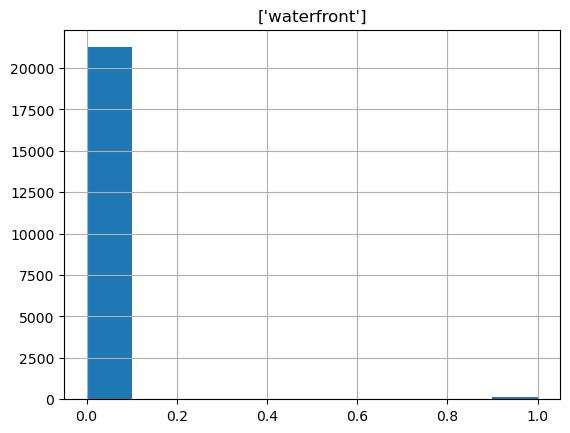

In [27]:
# Graph categorical variables.

data_cat['waterfront'].hist(bins=10)
plt.title(['waterfront'])
plt.show()

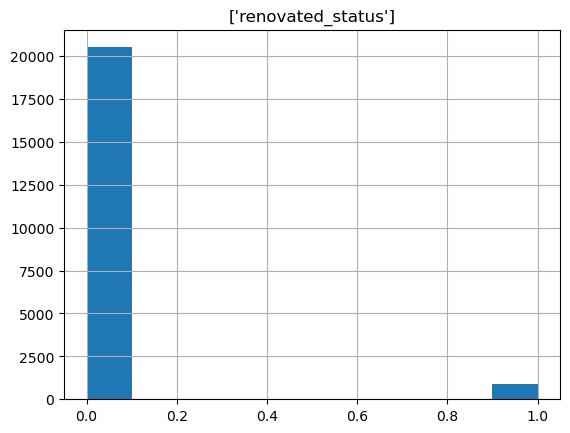

In [28]:
data_cat['renovated_status'].hist(bins=10)
plt.title(['renovated_status'])
plt.show()

### Variable 'zipcode'

Convert variable zipcode to categorical using dummies

In [29]:
# Convert "zipcode" to dummy variables using one-hot encoding
zipcode_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

# Introduce dummy variables into categorical dataframe
data_cat = pd.concat([data_cat, zipcode_dummies], axis=1)

# Combine dummy variables with other independent variables
data_model = pd.concat([data_num, data_cat], axis=1)

# Delete variable 'zipcode' from dataframe
data_model.drop('zipcode', axis=1, inplace = True)
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21418 entries, 0 to 21596
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bedrooms          21418 non-null  int64   
 1   bathrooms         21418 non-null  float64 
 2   floors            21418 non-null  float64 
 3   view              21418 non-null  int64   
 4   condition         21418 non-null  int64   
 5   grade             21418 non-null  int64   
 6   sqft_above        21418 non-null  float64 
 7   sqft_basement     21418 non-null  float64 
 8   sqft_living15     21418 non-null  float64 
 9   sqft_lot15        21418 non-null  float64 
 10  price             21418 non-null  float64 
 11  house_age         21418 non-null  int64   
 12  waterfront        21418 non-null  category
 13  renovated_status  21418 non-null  category
 14  zip_98002         21418 non-null  uint8   
 15  zip_98003         21418 non-null  uint8   
 16  zip_98004         2141

In [30]:
data_model

,bedrooms,bathrooms,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.00,1.0,0,3,7,0.089602,0.000000,0.161934,0.005742,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2.0,0,3,7,0.199115,0.082988,0.222165,0.008027,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,0,3,6,0.044248,0.000000,0.399415,0.008513,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0,5,7,0.075221,0.188797,0.165376,0.004996,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0,3,8,0.144912,0.000000,0.241094,0.007871,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,3,8,0.128319,0.000000,0.194631,0.000986,...,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2.0,0,3,8,0.214602,0.000000,0.246257,0.007523,...,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,2.0,0,3,7,0.071903,0.000000,0.106866,0.001558,...,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,2.0,0,3,8,0.136062,0.000000,0.173980,0.000731,...,0,0,0,0,0,0,0,0,0,0


# MODELS
- Significance level is set to 0,90. Therefor, p-values <0,1 will be taken into account.

#### Define dependent and independent variables

In [31]:
# Define the target variable (y) and the feature matrix (X_model1)
y = data_model['price']
X_model1 = data_model.drop(['price'], axis=1)

### OLS1 train-test

In [32]:
# Define OLS train-test function:

def train_test_ols_summary_save_model(X, y, test_size=0.25):
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Add constant to the independent variables for the intercept term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Fit the OLS model on the training data
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    
    # Make predictions on the test data
    y_pred = results.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_test - y_pred) ** 2)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Calculate R-squared
    r_squared = results.rsquared
    
    # Calculate Adjusted R-squared
    n = X_test.shape[0]
    p = X_test.shape[1] - 1  # Subtract 1 for the intercept term
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    
    return mse, rmse, r_squared, adj_r_squared, results, results.summary()


In [33]:
# Call function for model 1
mse_ols1, rmse_ols1, r_squared_ols1, adj_r_squared_ols1, model_ols1, summary_ols1 = train_test_ols_summary_save_model(X_model1, y)
print("Model 1:")
print("MSE:", mse_ols1)
print("RMSE:", rmse_ols1)
print("R-squared:", r_squared_ols1)
print("Adjusted R-squared:", adj_r_squared_ols1)
print(summary_ols1)

Model 1:
MSE: 0.00043483296111904965
RMSE: 0.02085264877944885
R-squared: 0.8069624507599239
Adjusted R-squared: 0.8039599699105904
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     814.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:54:33   Log-Likelihood:                 39068.
No. Observations:               16063   AIC:                        -7.797e+04
Df Residuals:                   15980   BIC:                        -7.733e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      

### KNN1 train-test

In [34]:
# Define model function:

def train_test_knn(X, y, test_size=0.25, n_neighbors=5):
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the KNN model with the specified number of neighbors (k)
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)

    # Calculate Adjusted R-squared
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    return mse, rmse, r_squared, adj_r_squared, knn

In [35]:
# Check for number of neighbours
score_knn1 = []
for i in range(2,10):
    model_knn1 = KNeighborsRegressor(n_neighbors=i)
    model_knn1.fit(X_model1, y)
    score_knn1.append(model_knn1.score(X_model1, y))

Text(0, 0.5, 'Accuracy')

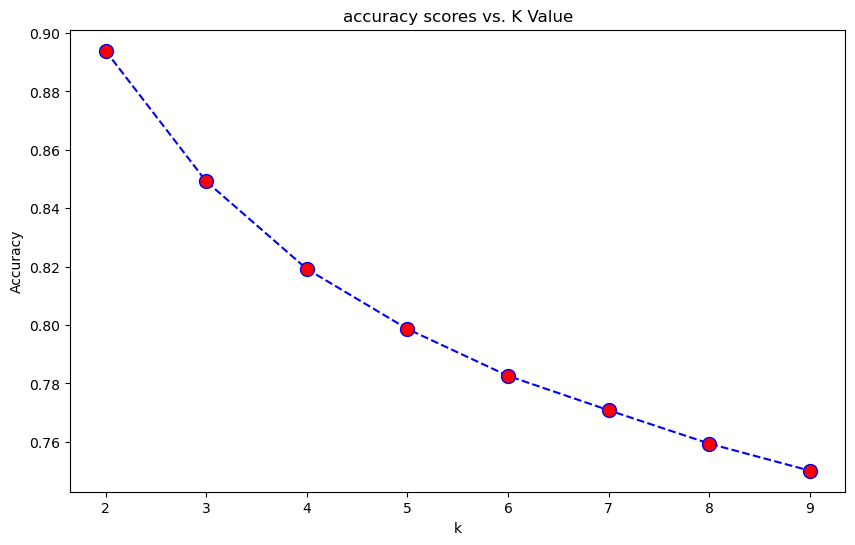

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),score_knn1, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

In [37]:
# Define number of neighbour 'k' according to plot
k1=2

In [38]:
mse_knn1, rmse_knn1, r_squared_knn1, adj_r_squared_knn1, knn_model_1 = train_test_knn(X_model1, y, n_neighbors=k1)
print("Model 1:")
print("MSE:", mse_knn1)
print("RMSE:", rmse_knn1)
print("R-squared:", r_squared_knn1)
print("Adjusted R-squared:", adj_r_squared_knn1)

Model 1:
MSE: 0.0008435282032287902
RMSE: 0.029043557000284766
R-squared: 0.630113738486194
Adjusted R-squared: 0.6243605758450461


### MLP1 train-test

In [39]:
def train_test_mlp(X, y, test_size=0.25, hidden_layer_sizes=(100,), max_iter=200):
    
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the MLP model with the specified hidden_layer_sizes and max_iter
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)

    # Fit the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = mlp.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)

    # Calculate Adjusted R-squared
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    return mse, rmse, r_squared, adj_r_squared, mlp

In [40]:
mse_mlp1, rmse_mlp1, r_squared_mlp1, adj_r_squared_mlp1, mlp_model_1 = train_test_mlp(X_model1, y)
print("Model 1:")
print("MSE:", mse_mlp1)
print("RMSE:", rmse_mlp1)
print("R-squared:", r_squared_mlp1)
print("Adjusted R-squared:", adj_r_squared_mlp1)

Model 1:
MSE: 0.0005758431088212214
RMSE: 0.023996731211171688
R-squared: 0.7474933808673161
Adjusted R-squared: 0.7435659258656317


## ENHACE MODELS

#### Eliminate variables with p-value > 0,1

In [41]:
# Get the p-values from the OLS results summary
p_values_ols1 = model_ols1.pvalues

# Identify features with p-values above 0.1
features_to_drop_ols1 = p_values_ols1[p_values_ols1 > 0.1].index
features_to_drop_ols1
# Drop the features from the DataFrame
X_model2 = X_model1.drop(features_to_drop_ols1, axis=1)

features_to_drop_ols1

Index(['zip_98003', 'zip_98022', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98042', 'zip_98198'],
      dtype='object')

#### Verify Variance Inflation Factor to determine multicollineality

In [42]:
# Note: Numeric dataframe is used (not including categorical variables)

# Drop target variable 'price'
data_corr.drop(['price'], axis = 1, inplace = True)

# Calculate VIF
vif = {}
data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif

{'const': 83.61864704787635,
 'bedrooms': 6.1328227404240145,
 'bathrooms': 29.915349061718455,
 'floors': 61.654015252310096,
 'view': 1.8278262575169362,
 'condition': 7.074050005962611,
 'grade': 27.52689596766747,
 'sqft_above': 69.77619365283999,
 'sqft_basement': 9.599576519177544,
 'sqft_living15': 20.079214065867564,
 'sqft_lot15': 8.14933713678569,
 'house_age': 63.97121802851022}

Variable sqft_above has the highest VIF. 

In [43]:
# Eliminate variable sqft_above from data_corr since it will be used later on.

data_corr.drop(['sqft_above'], axis = 1, inplace=True)

In [44]:
# Eliminate variable sqft_above from independent variables dataframe. 

X_model2.drop(['sqft_above'], axis = 1, inplace = True)

### OLS2 train-test

In [45]:
mse_ols2, rmse_ols2, r_squared_ols2, adj_r_squared_ols2, model_ols2, summary_ols2 = train_test_ols_summary_save_model(X_model2, y)

print("\nModel 2 Evaluation Metrics:")
print("MSE:", mse_ols2)
print("RMSE:", rmse_ols2)
print("R-squared:", r_squared_ols2)
print("Adjusted R-squared:", adj_r_squared_ols2)

# Print the OLS summary
print("\nModel 2 OLS Summary:")
print(summary_ols2)


Model 2 Evaluation Metrics:
MSE: 0.000535822776888921
RMSE: 0.023147846052903518
R-squared: 0.7643304480772065
Adjusted R-squared: 0.7610275035995007

Model 2 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     700.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:54:58   Log-Likelihood:                 37466.
No. Observations:               16063   AIC:                        -7.478e+04
Df Residuals:                   15988   BIC:                        -7.421e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                       coef    std er

### KNN2 train-test

In [46]:
score_knn2 = []
for i in range(2,10):
    model_knn2 = KNeighborsRegressor(n_neighbors=i)
    model_knn2.fit(X_model2, y)
    score_knn2.append(model_knn2.score(X_model2, y))

Text(0, 0.5, 'Accuracy')

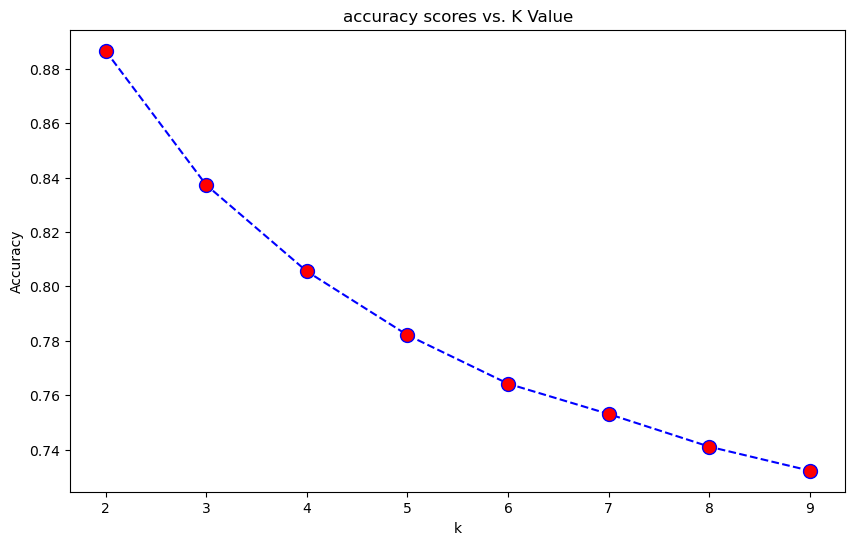

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),score_knn2,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

In [48]:
k2=2

In [49]:
mse_knn2, rmse_knn2, r_squared_knn2, adj_r_squared_knn2, knn_model_2 = train_test_knn(X_model2, y, n_neighbors=k2)
print("\nModel 2:")
print("MSE:", mse_knn2)
print("RMSE:", rmse_knn2)
print("R-squared:", r_squared_knn2)
print("Adjusted R-squared:", adj_r_squared_knn2)


Model 2:
MSE: 0.0008802466075390374
RMSE: 0.029668950226441067
R-squared: 0.6140127554401227
Adjusted R-squared: 0.6086030857247002


### MLP2 train-test

In [50]:
mse_mlp2, rmse_mlp2, r_squared_mlp2, adj_r_squared_mlp2, mlp_model_2 = train_test_mlp(X_model2, y)
print("\nModel 2:")
print("MSE:", mse_mlp2)
print("RMSE:", rmse_mlp2)
print("R-squared:", r_squared_mlp2)
print("Adjusted R-squared:", adj_r_squared_mlp2)


Model 2:
MSE: 0.0006414701951868185
RMSE: 0.025327261896755018
R-squared: 0.7187159700624394
Adjusted R-squared: 0.7147737317640721


# ENHACE MODEL

#### Eliminate variables with p-value > 0,1

In [51]:
# Get the p-values from the OLS results summary
p_values_ols2 = model_ols2.pvalues

# Identify features with p-values above 0.1
features_to_drop_ols2 = p_values_ols2[p_values_ols2 > 0.1].index
features_to_drop_ols2

# Drop the features from the DataFrame
X_model3 = X_model2.drop(features_to_drop_ols2, axis=1) 

features_to_drop_ols2


Index(['floors'], dtype='object')

Variable 'floor' has been dropped

#### Verify Variance Inflation Factor to determine multicollineality

In [52]:
# Note: Numeric dataframe is used (not including categorical variables)

# Drop target variable 'floors' drom data_corr dataframe

data_corr.drop(['floors'], axis = 1, inplace = True)

# Calculate VIF
vif = {}
#data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif

{'const': 12.866978851399935,
 'bedrooms': 3.091548675265218,
 'bathrooms': 21.335509882486026,
 'view': 1.4659646500395938,
 'condition': 2.5129708400160577,
 'grade': 17.896766652276224,
 'sqft_basement': 1.9146695007913241,
 'sqft_living15': 10.017404132182703,
 'sqft_lot15': 1.6863990652717802,
 'house_age': 14.784171880331577}

In [53]:
# Drop variable with highest VIF
X_model3.drop(['bathrooms'], axis=1, inplace=True)

### OLS3 train-test

In [54]:
mse_ols3, rmse_ols3, r_squared_ols3, adj_r_squared_ols3, model_ols3, summary_ols3 = train_test_ols_summary_save_model(X_model3, y)
print("\nModel 3 Evaluation Metrics:")
print("MSE:", mse_ols3)
print("RMSE:", rmse_ols3)
print("R-squared:", r_squared_ols3)
print("Adjusted R-squared:", adj_r_squared_ols3)

# Print the OLS summary
print("\nModel 3 OLS Summary:")
print(summary_ols3)


Model 3 Evaluation Metrics:
MSE: 0.0005647369058161345
RMSE: 0.023764193775849717
R-squared: 0.7539914298300133
Adjusted R-squared: 0.7506380377337925

Model 3 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     680.7
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:55:19   Log-Likelihood:                 37121.
No. Observations:               16063   AIC:                        -7.410e+04
Df Residuals:                   15990   BIC:                        -7.354e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                       coef    std e

### KNN3 train-test

In [55]:
score_knn3 = []
for i in range(2,10):
    model_knn3 = KNeighborsRegressor(n_neighbors=i)
    model_knn3.fit(X_model3, y)
    score_knn3.append(model_knn3.score(X_model3, y))

Text(0, 0.5, 'Accuracy')

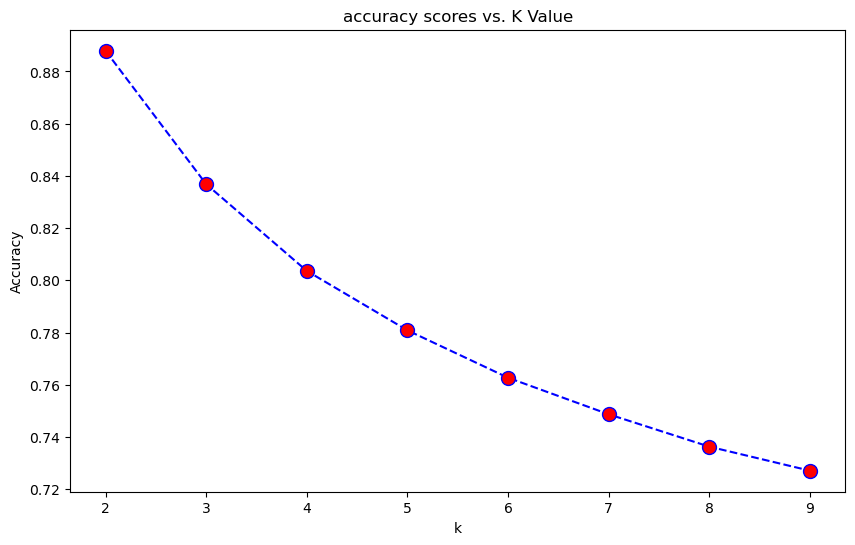

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),score_knn3,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('k')
plt.ylabel('Accuracy')

In [57]:
k3=2

In [58]:
mse_knn3, rmse_knn3, r_squared_knn3, adj_r_squared_knn3, knn_model_3 = train_test_knn(X_model3, y, n_neighbors=k3)
print("\nModel 3:")
print("MSE:", mse_knn3)
print("RMSE:", rmse_knn3)
print("R-squared:", r_squared_knn3)
print("Adjusted R-squared:", adj_r_squared_knn3)


Model 3:
MSE: 0.000892339466399667
RMSE: 0.029872051593415324
R-squared: 0.6087100490956863
Adjusted R-squared: 0.6033762973983916


### MLP 3 train - test

In [59]:
mse_mlp3, rmse_mlp3, r_squared_mlp3, adj_r_squared_mlp3, mlp_model_3 = train_test_mlp(X_model3, y)
print("\nModel 3:")
print("MSE:", mse_mlp3)
print("RMSE:", rmse_mlp3)
print("R-squared:", r_squared_mlp3)
print("Adjusted R-squared:", adj_r_squared_mlp3)


Model 3:
MSE: 0.0007944806290348748
RMSE: 0.02818653276007666
R-squared: 0.6516210500206108
Adjusted R-squared: 0.6468722267721223


# BEST PERFORMING MODEL

In [60]:
model_comparison = pd.DataFrame({'train-test':['OLS1', 'OLS2', 'OLS3', 'KNN1', 'KNN2', 'KNN3', 'MLP1', 'MLP2', 'MLP3'], 'Mean Squared Error': [mse_ols1, mse_ols2, mse_ols3, mse_knn1, mse_knn2, mse_knn3, mse_mlp1, mse_mlp2, mse_mlp3], 'Root Mean Squared Error': [rmse_ols1, rmse_ols2, rmse_ols3, rmse_knn1, rmse_knn2,rmse_knn3, rmse_mlp1, rmse_mlp2, rmse_mlp3], 'R-Squared': [r_squared_ols1, r_squared_ols2, r_squared_ols3, r_squared_knn1, r_squared_knn2, r_squared_knn3, r_squared_mlp1, r_squared_mlp2, r_squared_mlp3], 'Adjusted R-Squared': [adj_r_squared_ols1, adj_r_squared_ols2, adj_r_squared_ols3, adj_r_squared_knn1, adj_r_squared_knn2, adj_r_squared_knn3, adj_r_squared_mlp1, adj_r_squared_mlp2, adj_r_squared_mlp3]})
model_comparison

,train-test,Mean Squared Error,Root Mean Squared Error,R-Squared,Adjusted R-Squared
0,OLS1,0.000435,0.020853,0.806962,0.803960
1,OLS2,0.000536,0.023148,0.764330,0.761028
2,OLS3,0.000565,0.023764,0.753991,0.750638
3,KNN1,0.000844,0.029044,0.630114,0.624361
4,KNN2,0.000880,0.029669,0.614013,0.608603
5,KNN3,0.000892,0.029872,0.608710,0.603376
6,MLP1,0.000576,0.023997,0.747493,0.743566
7,MLP2,0.000641,0.025327,0.718716,0.714774
8,MLP3,0.000794,0.028187,0.651621,0.646872


The best performing model is OLS3

Analyze indepdendent variable dataframe in order to identy most relevant features: eliminate variables with p-values > 0,1 and sort by coefficient.

In [61]:
# Eliminate variables with p-value > 0.1

# Get the p-values from the OLS results summary
p_values_ols3 = model_ols3.pvalues

# Identify features with p-values above 0.1
features_to_drop_ols3 = p_values_ols3[p_values_ols3 > 0.1].index

# Extract the coefficients
coefficients_ols3 = model_ols3.params[1:]  # Exclude the constant term

# Drop features with p-values above 0.1 from the coefficients Series
coefficients_ols3 = coefficients_ols3.drop(features_to_drop_ols3)

# Assign column name to 'Coefficient'
coef_pval_ols3 = pd.DataFrame({'Coefficient': coefficients_ols3})

# Sort the DataFrame by coefficients in ascending order
sorted_coef_pval_ols3 = coef_pval_ols3.sort_values(by='Coefficient')

sorted_coef_pval_ols3.tail(25)

,Coefficient
zip_98006,0.028567
zip_98008,0.030642
zip_98053,0.031739
sqft_basement,0.032335
zip_98116,0.033558
zip_98144,0.033588
zip_98005,0.034608
zip_98122,0.036065
zip_98117,0.037902
zip_98103,0.038227


Most relevant variables are: location (zipcode), waterfront, sqft_living15, sqft_lot15 and sqft_basement

## ANALYSIS FOR HOUSES WITH MARKET PRICE >= 650000

In [62]:
df_65=data[data['price']>=650000]
df_65

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age,renovated_status
5,4,4.50,1.0,0,0,3,11,3890,1530,98053,4760,101930,1230000,14,0
10,3,2.50,1.0,0,0,3,8,1860,1700,98007,2210,8925,662500,50,0
15,4,3.00,2.0,0,3,3,9,1980,970,98126,2140,4000,650000,36,0
21,3,2.75,1.0,0,4,3,9,2330,720,98040,4110,20336,2000000,47,0
26,3,1.75,2.0,0,0,3,8,1750,700,98119,1760,3573,937000,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,5,2.75,2.0,0,0,3,9,3600,0,98059,3550,9421,679950,1,0
21581,4,3.25,2.0,0,0,3,10,3410,0,98040,2290,10125,1580000,8,0
21583,4,3.00,2.0,0,0,3,9,3990,0,98053,3370,6814,810000,12,0
21584,5,3.75,2.0,0,0,3,11,4470,0,98004,2780,8964,1540000,7,0


#### Check for correlations

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/494417133.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_65_corr = df_65.corr()


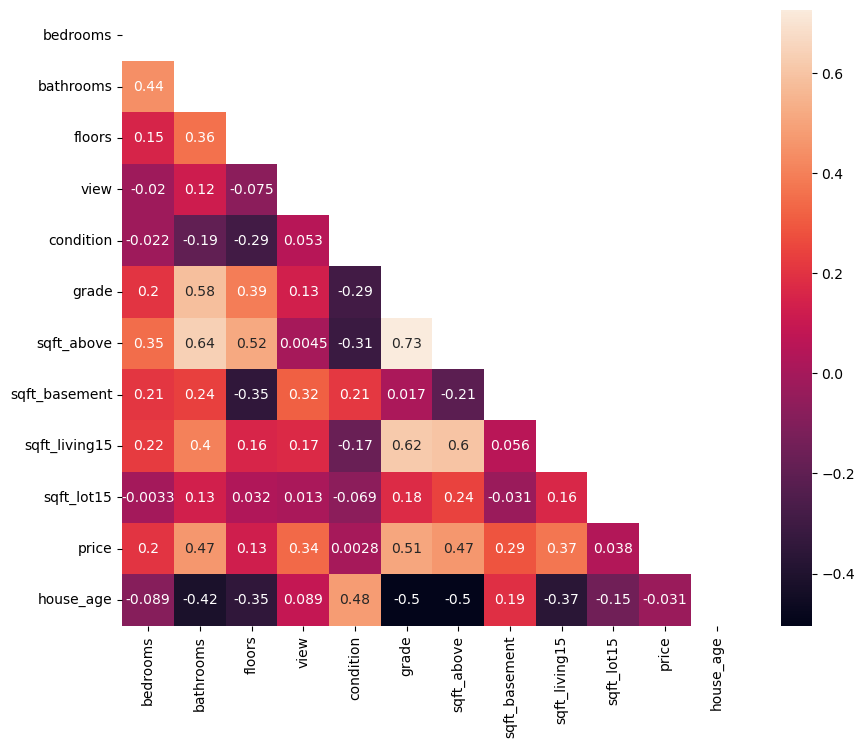

In [63]:
# Check for correlations

df_65_corr = df_65.corr()
mask = np.zeros_like(df_65_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_65_corr, mask=mask, annot=True)
plt.show()

#### Check for VIF

In [64]:
# Drop target variable 'price'
df_65_corr.drop(['price'], axis = 1, inplace = True)

# Calculate VIF
vif = {}
df_houses_corr = add_constant(df_65_corr)
for i in np.arange(df_houses_corr.shape[1]):
    column_name = df_houses_corr.columns[i]
    value = variance_inflation_factor(np.array(df_houses_corr), i)
    vif[column_name] = value

vif

{'const': 143.87915406344214,
 'bedrooms': 5.187209813409478,
 'bathrooms': 15.737450489311698,
 'floors': 65.72232982279212,
 'view': 3.6406082094076586,
 'condition': 17.401523013877057,
 'grade': 27.493448061495652,
 'sqft_above': 50.44811415616145,
 'sqft_basement': 16.68434136295502,
 'sqft_living15': 18.564006828823544,
 'sqft_lot15': 14.93254510991905,
 'house_age': 85.06221985519505}

In [65]:
# Drop variable with highest VIF
df_65.drop(['house_age'], axis = 1, inplace = True)

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/782566654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_65.drop(['house_age'], axis = 1, inplace = True)


#### Transform numeric variables

In [66]:
lista_houses=['sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']
for i in lista_houses:
    print (minmax_scaler(df_65, i))

       bedrooms  bathrooms  floors waterfront  view  condition  grade  \
5             4       4.50     1.0          0     0          3     11   
10            3       2.50     1.0          0     0          3      8   
15            4       3.00     2.0          0     3          3      9   
21            3       2.75     1.0          0     4          3      9   
26            3       1.75     2.0          0     0          3      8   
...         ...        ...     ...        ...   ...        ...    ...   
21580         5       2.75     2.0          0     0          3      9   
21581         4       3.25     2.0          0     0          3     10   
21583         4       3.00     2.0          0     0          3      9   
21584         5       3.75     2.0          0     0          3     11   
21590         4       3.50     2.0          0     0          3      9   

       sqft_above  sqft_basement zipcode  sqft_living15  sqft_lot15    price  \
5        0.374858           1530   98053   

/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/3180959623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[x] = scaled_data
/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/3180959623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[x] = scaled_data
/var/folders/jy/zg9bhmlj65b0y29b07604xfw0000gn/T/ipykernel_7142/3180959623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

#### Create dummy variables

In [67]:
# Copy dataframe to work with zipcodes
df_65_zipcode = df_65.copy()

# Convert "zipcode" to dummy variables using one-hot encoding
zipcode_dummies_model = pd.get_dummies(df_65_zipcode['zipcode'], prefix='zip', drop_first=True)

# Introduce dummy variables into categorical dataframe
df_65_zipcode = pd.concat([df_65_zipcode, zipcode_dummies_model], axis=1)

# Delete variable 'zipcode' from dataframe
df_65_zipcode.drop(['zipcode'], axis=1, inplace = True)

df_65_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 5 to 21590
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bedrooms          5305 non-null   int64   
 1   bathrooms         5305 non-null   float64 
 2   floors            5305 non-null   float64 
 3   waterfront        5305 non-null   category
 4   view              5305 non-null   int64   
 5   condition         5305 non-null   int64   
 6   grade             5305 non-null   int64   
 7   sqft_above        5305 non-null   float64 
 8   sqft_basement     5305 non-null   float64 
 9   sqft_living15     5305 non-null   float64 
 10  sqft_lot15        5305 non-null   float64 
 11  price             5305 non-null   float64 
 12  renovated_status  5305 non-null   category
 13  zip_98002         5305 non-null   uint8   
 14  zip_98003         5305 non-null   uint8   
 15  zip_98004         5305 non-null   uint8   
 16  zip_98005         5305 

### OLS model for houses with market price >= 650000

In [68]:
# Separate the dependent variable 'price' (y) and independent variables (X)
y_65_zipcode = df_65_zipcode['price']
X_65_zipcode = df_65_zipcode.drop(['price'], axis=1)

In [69]:
mse_ols4, rmse_ols4, r_squared_ols4, adj_r_squared_ols4, model_ols4, summary_ols4 = train_test_ols_summary_save_model(X_65_zipcode, y_65_zipcode)

print("\nModel 4 Evaluation Metrics:")
print("MSE:", mse_ols4)
print("RMSE:", rmse_ols4)
print("R-squared:", r_squared_ols4)
print("Adjusted R-squared:", adj_r_squared_ols4)

# Print the OLS summary
print("\nModel 4 OLS Summary:")
print(summary_ols4)


Model 4 Evaluation Metrics:
MSE: 0.0010180335623765665
RMSE: 0.03190663821803492
R-squared: 0.727899537017693
Adjusted R-squared: 0.7101966153296875

Model 4 OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:55:45   Log-Likelihood:                 7577.2
No. Observations:                3978   AIC:                        -1.501e+04
Df Residuals:                    3904   BIC:                        -1.454e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                       coef    std err

In [76]:
# Eliminate variables with p-value > 0.1

# Get the p-values from the OLS results summary
p_values_ols4 = model_ols4.pvalues

# Identify features with p-values above 0.1
features_to_drop_ols4 = p_values_ols4[p_values_ols4 > 0.1].index

# Extract the coefficients
coefficients_ols4 = model_ols4.params[1:]  # Exclude the constant term

# Drop features with p-values above 0.1 from the coefficients Series
coefficients_ols4 = coefficients_ols4.drop(features_to_drop_ols4)

# Assign column name to 'Coefficient'
coef_pval_ols4 = pd.DataFrame({'Coefficient': coefficients_ols4})

# Sort the DataFrame by coefficients in ascending order
sorted_coef_pval_ols4 = coef_pval_ols4.sort_values(by='Coefficient')

sorted_coef_pval_ols4.tail(25)

,Coefficient
grade,0.010896
zip_98177,0.010970
zip_98008,0.012262
renovated_status,0.013086
sqft_living15,0.021329
zip_98116,0.021814
zip_98033,0.029434
zip_98144,0.030917
zip_98199,0.034234
zip_98117,0.034648


In [77]:
# Extract the coefficients and p-values from the OLS model summary
coefficients_65 = model_ols4.params[1:]  # Exclude the constant term
p_values_65 = model_ols4.pvalues[1:]

# Combine coefficients and p-values into a DataFrame
coef_pval_65 = pd.DataFrame({'Coefficient': coefficients_65, 'P-value': p_values_65})

# Sort the DataFrame by p-values in ascending order
sorted_coef_pval_65 = coef_pval_65.sort_values(by='P-value')

# Print the sorted results
sorted_coef_pval_65

# Sort the DataFrame by absolute coefficients in descending order
sorted_abs_coef_65 = coef_pval_65.reindex(coef_pval_65['Coefficient'].abs().sort_values(ascending=False).index)

sorted_coef_pval_652 = coef_pval_65.sort_values(by='Coefficient')

sorted_coef_pval_652.tail(50)

,Coefficient,P-value
zip_98019,-7.378461e-03,6.852958e-01
zip_98155,-6.984860e-03,3.809184e-01
bedrooms,-5.657663e-03,3.903564e-13
sqft_lot15,-3.319231e-03,8.672677e-01
zip_98125,-2.501539e-03,6.940589e-01
zip_98052,-1.830559e-03,5.329350e-01
zip_98002,-6.857764e-17,6.444207e-02
zip_98108,-3.291741e-17,1.887811e-09
zip_98055,-1.603055e-17,4.186440e-01
zip_98168,0.000000e+00,NaN


In [74]:
# Save file to be used in tableau
file_path = 'data_tableau.xlsx'
data_tableau.to_excel(file_path, index=False)

In [75]:
data_tableau_65 = df_65